In [17]:
# import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import warnings
warnings.filterwarnings("ignore")

### Import major incidents files

These are separated into Northern and Southern California Area Coordination Centers. Each report had to be downloaded separately by year. I will pull them all into individual variables which can then be concatenated together to create one inclusive incident report dataframe.

This data includes all major wildfire incidents, defined as larger than 100 acres.

In [2]:
fire_df_nc_19 = pd.read_excel('./claire_data/Significant Incident Summary Spreadsheet by GACC norcal 2019.xlsx')
fire_df_nc_18 = pd.read_excel('./claire_data/Significant Incident Summary Spreadsheet by GACC norcal 2018.xlsx')
fire_df_nc_17 = pd.read_excel('./claire_data/Significant Incident Summary Spreadsheet by GACC norcal 2017.xlsx')
fire_df_nc_16 = pd.read_excel('./claire_data/Significant Incident Summary Spreadsheet by GACC norcal 2016.xlsx')
fire_df_nc_15 = pd.read_excel('./claire_data/Significant Incident Summary Spreadsheet by GACC norcal 2015.xlsx')
fire_df_nc_14 = pd.read_excel('./claire_data/Significant Incident Summary Spreadsheet by GACC norcal 2014.xlsx')

fire_df_sc_19 = pd.read_excel('./claire_data/Significant Incident Summary Spreadsheet by GACC socal 2019.xlsx')
fire_df_sc_18 = pd.read_excel('./claire_data/Significant Incident Summary Spreadsheet by GACC socal 2018.xlsx')
fire_df_sc_17 = pd.read_excel('./claire_data/Significant Incident Summary Spreadsheet by GACC socal 2017.xlsx')
fire_df_sc_16 = pd.read_excel('./claire_data/Significant Incident Summary Spreadsheet by GACC socal 2016.xlsx')
fire_df_sc_15 = pd.read_excel('./claire_data/Significant Incident Summary Spreadsheet by GACC socal 2015.xlsx')
fire_df_sc_14 = pd.read_excel('./claire_data/Significant Incident Summary Spreadsheet by GACC socal 2014.xlsx')

In [3]:
fires_df = pd.concat([fire_df_nc_14, fire_df_sc_14, 
                      fire_df_nc_15, fire_df_sc_15,
                      fire_df_nc_16, fire_df_sc_16,
                      fire_df_nc_17, fire_df_sc_17,
                      fire_df_nc_18, fire_df_sc_18, 
                      fire_df_nc_19, fire_df_sc_19])

In [4]:
fires_df.head(2)

,State-Unit,Incident Number,Incident Name,Incident Type,Start Date,IC Name,Team Type,Latitude,Longitude,Size,Unit of Measure,Costs,Anticipated Containment / Completion Date,Structures Destroyed
0,CA-LNU,CA-LNU-0005333,BUTTS,WF,07/01/2014 1405 CT,"DC, SCOTT UPTON, LNU-CALFIRE",Type 3 IC,39,123,3200.0,Acres,6500000.0,NaN,5
1,CA-AEU,CA-AEU-018237,SAND,WF,07/25/2014 1834 CT,"BC Mike Olivarria, AEU",Type 3 IC,39,121,4240.0,Acres,875500.0,08/02/2014 1400,67


In [5]:
fires_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 588 entries, 0 to 43
Data columns (total 14 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   State-Unit                                 588 non-null    object 
 1   Incident Number                            588 non-null    object 
 2   Incident Name                              588 non-null    object 
 3   Incident Type                              588 non-null    object 
 4   Start Date                                 588 non-null    object 
 5   IC Name                                    587 non-null    object 
 6   Team Type                                  559 non-null    object 
 7   Latitude                                   588 non-null    int64  
 8   Longitude                                  588 non-null    int64  
 9   Size                                       588 non-null    float64
 10  Unit of Measure            

In [6]:
fires_df['start_date'] = pd.to_datetime(fires_df['Start Date'], utc=True).dt.date

In [8]:
fires_df['year'] = pd.to_datetime(fires_df['Start Date'], utc=True).dt.year

In [10]:
fires_df.head(2)

,State-Unit,Incident Number,Incident Name,Incident Type,Start Date,IC Name,Team Type,Latitude,Longitude,Size,Unit of Measure,Costs,Anticipated Containment / Completion Date,Structures Destroyed,start_date,year
0,CA-LNU,CA-LNU-0005333,BUTTS,WF,07/01/2014 1405 CT,"DC, SCOTT UPTON, LNU-CALFIRE",Type 3 IC,39,123,3200.0,Acres,6500000.0,NaN,5,2014-07-01,2014
1,CA-AEU,CA-AEU-018237,SAND,WF,07/25/2014 1834 CT,"BC Mike Olivarria, AEU",Type 3 IC,39,121,4240.0,Acres,875500.0,08/02/2014 1400,67,2014-07-25,2014


In [11]:
fires_df.dropna(subset=['Costs'], axis=0, inplace=True)

In [12]:
fires_df['Incident Type'].value_counts()

WF    573
CX      9
OT      2
LS      1
WS      1
FL      1
Name: Incident Type, dtype: int64

In [13]:
# Drop all non-wildfire incidents
fires_df = fires_df[fires_df['Incident Type'] == 'WF']

In [14]:
fires_df_clean = fires_df.drop(columns = ['State-Unit', 'Start Date', 
                               'IC Name', 'Team Type', 'Anticipated Containment / Completion Date'])
fires_df_clean.head(2)

,Incident Number,Incident Name,Incident Type,Latitude,Longitude,Size,Unit of Measure,Costs,Structures Destroyed,start_date,year
0,CA-LNU-0005333,BUTTS,WF,39,123,3200.0,Acres,6500000.0,5,2014-07-01,2014
1,CA-AEU-018237,SAND,WF,39,121,4240.0,Acres,875500.0,67,2014-07-25,2014


In [15]:
fires_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 573 entries, 0 to 43
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Incident Number       573 non-null    object 
 1   Incident Name         573 non-null    object 
 2   Incident Type         573 non-null    object 
 3   Latitude              573 non-null    int64  
 4   Longitude             573 non-null    int64  
 5   Size                  573 non-null    float64
 6   Unit of Measure       573 non-null    object 
 7   Costs                 573 non-null    float64
 8   Structures Destroyed  573 non-null    int64  
 9   start_date            573 non-null    object 
 10  year                  573 non-null    int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 53.7+ KB


In [36]:
fires_df_clean.to_csv('./claire_data/fires_compiled.csv', index=False)

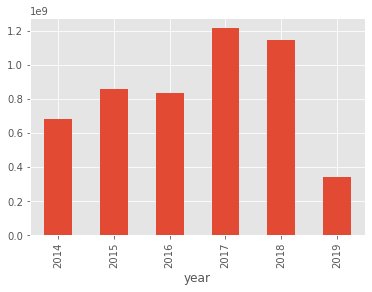

In [18]:
fires_df_clean.groupby('year')['Costs'].sum().plot(kind='bar');

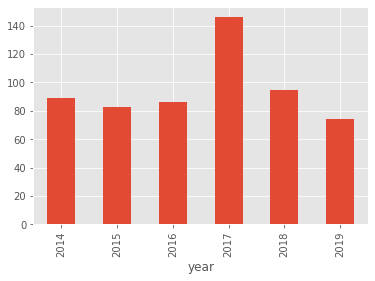

In [26]:
fires_df_clean.groupby('year')['Incident Number'].count().plot(kind='bar');

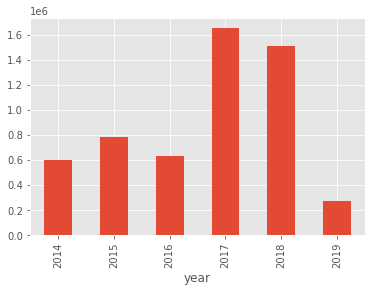

In [27]:
fires_df_clean.groupby('year')['Size'].sum().plot(kind='bar');

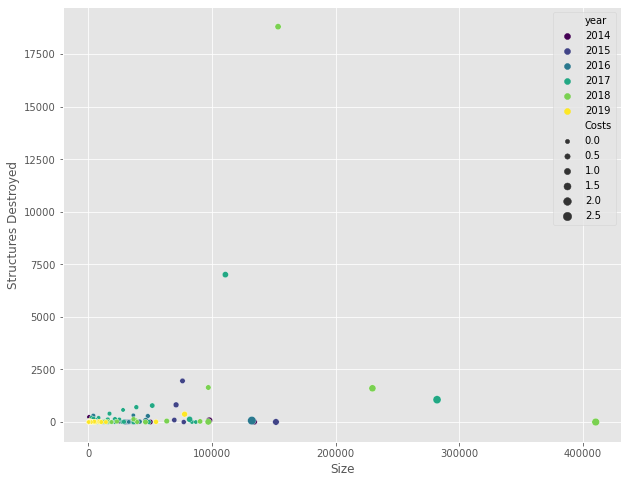

In [25]:
plt.style.use('ggplot')
plt.subplots(figsize=(10,8))
sns.scatterplot(x = 'Size', 
                y = 'Structures Destroyed', 
                data = fires_df_clean, 
                size= 'Costs',
                hue='year',
                palette='viridis')
plt.legend(loc='best');

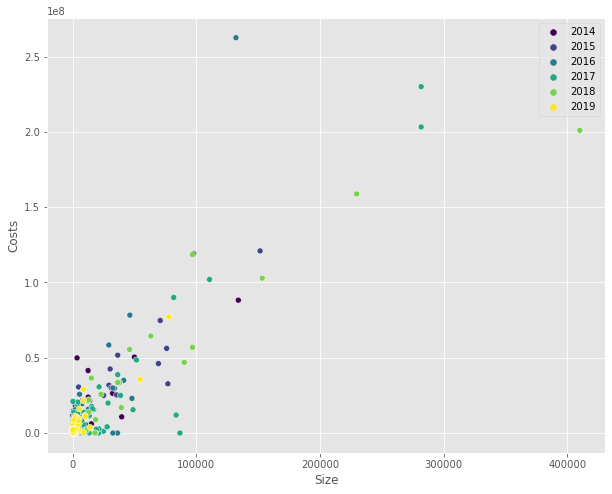

In [28]:
plt.style.use('ggplot')
plt.subplots(figsize=(10,8))
sns.scatterplot(x = 'Size', 
                y = 'Costs', 
                data = fires_df_clean, 
                hue='year',
                palette='viridis')
plt.legend(loc='best');

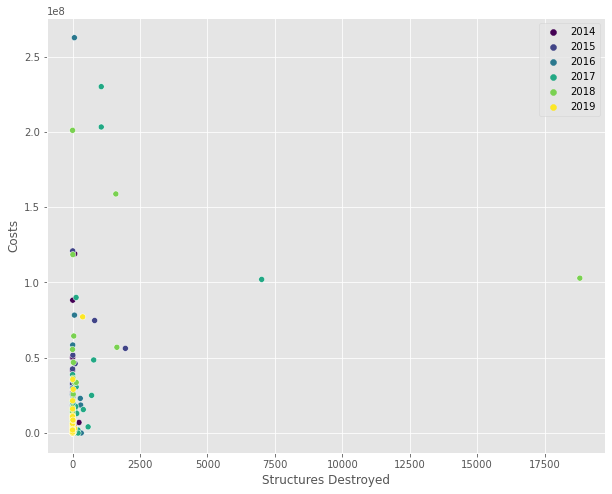

In [29]:
plt.style.use('ggplot')
plt.subplots(figsize=(10,8))
sns.scatterplot(x = 'Structures Destroyed', 
                y = 'Costs', 
                data = fires_df_clean, 
                hue='year',
                palette='viridis')
plt.legend(loc='best');

In [24]:
fires_df.sort_values(by='Structures Destroyed', ascending=False)

,State-Unit,Incident Number,Incident Name,Incident Type,Start Date,IC Name,Team Type,Latitude,Longitude,Size,Unit of Measure,Costs,Anticipated Containment / Completion Date,Structures Destroyed,start_date,year
35,CA-BTU,CA-BTU-016737,CAMP,WF,11/08/2018 0629 PST,"Russell-CAL FIRE IMT 4,Bell-Butte County Sheri...",Type 1 Team,40,121,153336.0,Acres,102843527.0,11/25/2018 1200,18804,2018-11-08,2018
28,CA-LNU,CA-LNU-010104,CENTRAL LNU COMPLEX,WF,10/09/2017 0545 PDT,2 Zone IC's:\nKirk VanWormer\nMarshall Turbeville,Type 3 Team,38,123,110720.0,Acres,102000000.0,10/31/2017 1200,7010,2017-10-09,2017
15,CA-LNU,CA-LNU-008670,VALLEY,WF,09/12/2015 1325 PDT,Mike Wink,Type 3 Team,39,123,76067.0,Acres,56220000.0,10/06/2015 1200,1958,2015-09-12,2015
43,CA-VNC,CA-VNC-091023,WOOLSEY,WF,11/08/2018 1430 PST,Monday-VNC\nWhittle-LAC\nGage-LASD,Type 3 Team,34,119,96949.0,Acres,56943320.0,11/22/2018 1200,1643,2018-11-08,2018
30,CA-WNP,CA-WNP-001084,CARR,WF,07/23/2018 1318 PDT,"Nick Truax - CAL FIRE,\nTodd Mack, Dan Ostmann...",Type 3 Team,41,123,229651.0,Acres,158744844.0,09/01/2018 1200,1604,2018-07-23,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,CA-CNF,CA-CNF-002642,HOLY,WF,08/31/2016 0410 PDT,"Jacob Gipson USFS\nRon Roberts OCFA IMT #3\nR,...",Type 3 Team,34,118,150.0,Acres,1700000.0,09/05/2016 1200,0,2016-08-31,2016
31,CA-CND,CA-CND-001171,SODA,WF,06/04/2016 1741 PDT,Chris Matthews ICT4,Type 4 IC,35,120,2003.0,Acres,500000.0,06/06/2016 1200,0,2016-06-05,2016
30,CA-FKU,CA-FKU-006574,AVOCADO,WF,05/15/2016 1624 PDT,JIM FITZGERALD (CALFIRE FKU),NaN,37,119,132.0,Acres,50000.0,05/18/2016 1200,0,2016-05-15,2016
29,CA-BEU,CA-BEU-002369,METZ,WF,05/22/2016 1532 PDT,B. Muenzer\nCAL FIRE,Type 3 IC,36,121,3876.0,Acres,825436.0,05/25/2016 1200,0,2016-05-22,2016
